In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
# To make sure we are using gpu not cpu
import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
 # raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger
import tensorflow as tf
import pickle
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
datagen = ImageDataGenerator(rescale = 1./255)

In [5]:

train = datagen.flow_from_directory('/content/gdrive/MyDrive/DataSet/train', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/gdrive/MyDrive/DataSet/val', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/gdrive/MyDrive/DataSet/test', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3826 images belonging to 2 classes.
Found 1928 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
imgs, labels = next(train)

In [7]:
imgs.shape

(64, 224, 224, 3)

In [8]:
train.class_indices


{'Benign': 0, 'Malignant': 1}

1.0


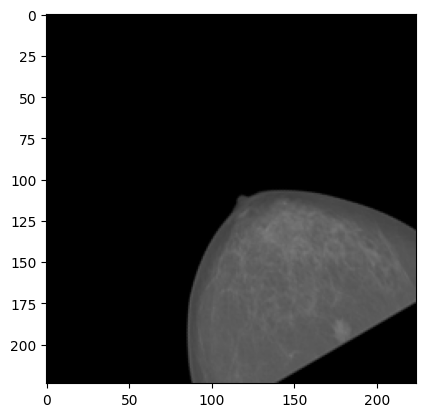

In [9]:
plt.imshow(imgs[0])
print(labels[0])

#Neural network

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [12]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [13]:
csv_logger = CSVLogger('/content/gdrive/My Drive/training.log', separator=',', append=False)

In [14]:
history = model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=5,
                    callbacks=[csv_logger])
model.save('/content/gdrive/My Drive/first_model.h5')

<ipython-input-14-59d1acaf0fa3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train,


Epoch 1/5
59/59 [==============================] - 1046s 18s/step - loss: 0.6583 - accuracy: 0.6579 - val_loss: 0.6323 - val_accuracy: 0.6698
Epoch 2/5
59/59 [==============================] - 20s 340ms/step - loss: 0.6406 - accuracy: 0.6699 - val_loss: 0.6350 - val_accuracy: 0.6698
Epoch 3/5
59/59 [==============================] - 19s 325ms/step - loss: 0.6410 - accuracy: 0.6701 - val_loss: 0.6335 - val_accuracy: 0.6698
Epoch 4/5
59/59 [==============================] - 17s 296ms/step - loss: 0.6347 - accuracy: 0.6704 - val_loss: 0.6367 - val_accuracy: 0.6698
Epoch 5/5
59/59 [==============================] - 20s 342ms/step - loss: 0.6292 - accuracy: 0.6709 - val_loss: 0.6231 - val_accuracy: 0.6698


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:

import pandas as pd
log_data = pd.read_csv('/content/gdrive/My Drive/training.log', sep=',', engine='python')

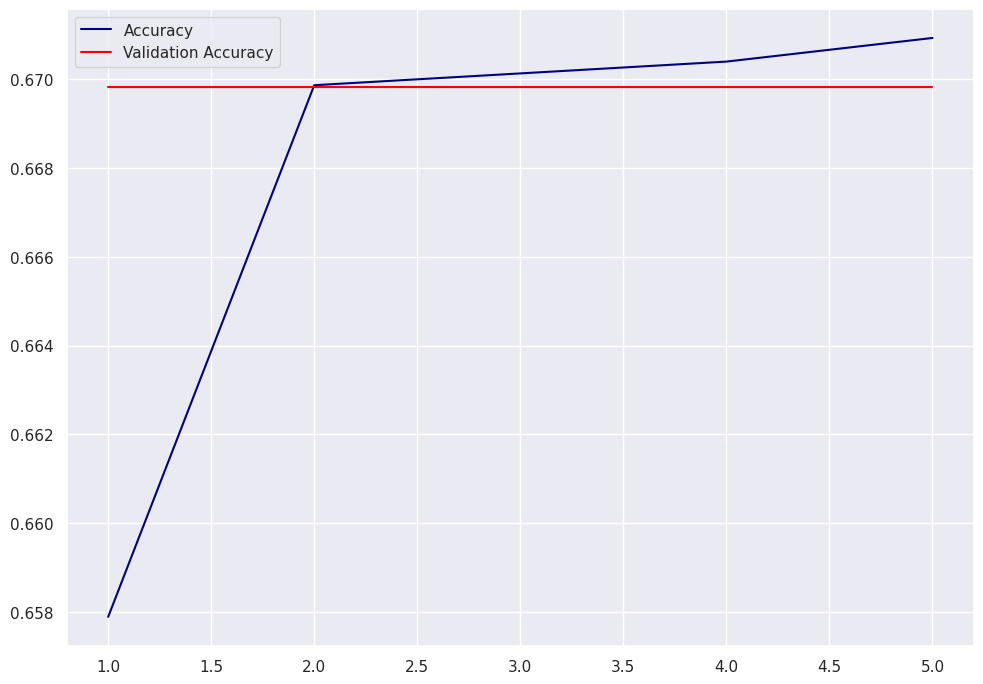

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

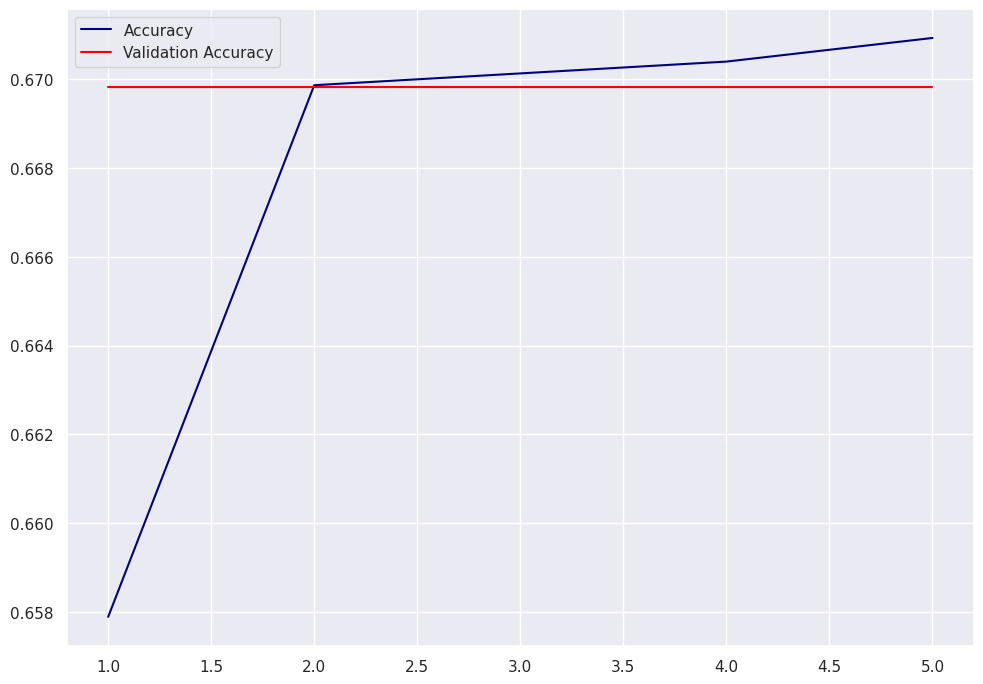

In [17]:
# show the accuracy graph from the saved history (log_data)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

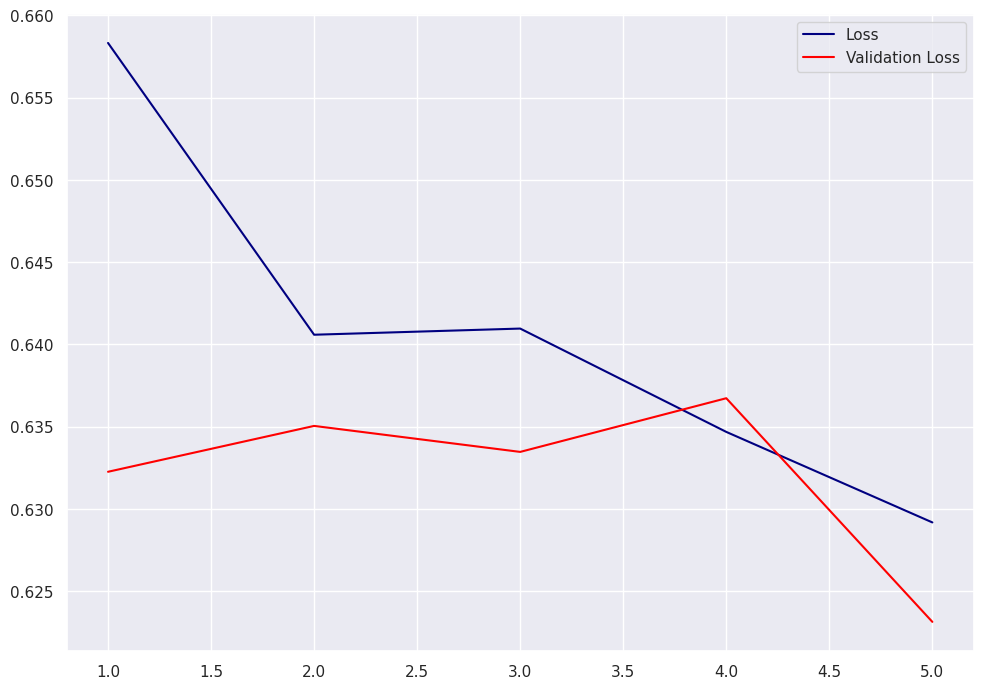

In [18]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

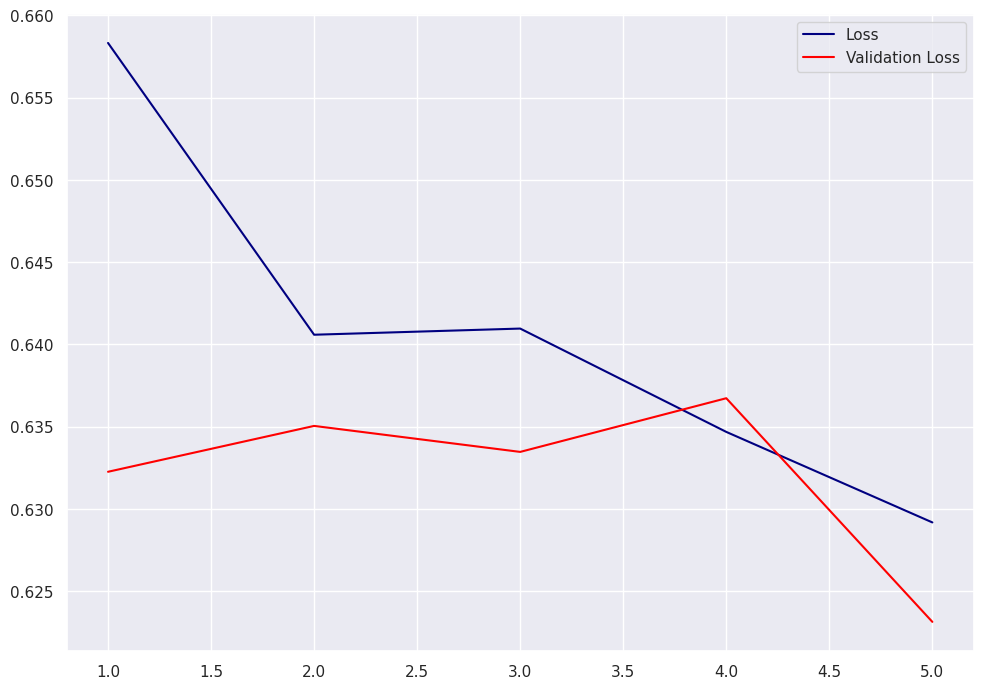

In [19]:
# show the loss graph from the saved history (log_data)

plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['val_loss'], color='red', label='Validation Loss')
plt.legend()

#ACCURACY & LOSS CURVES

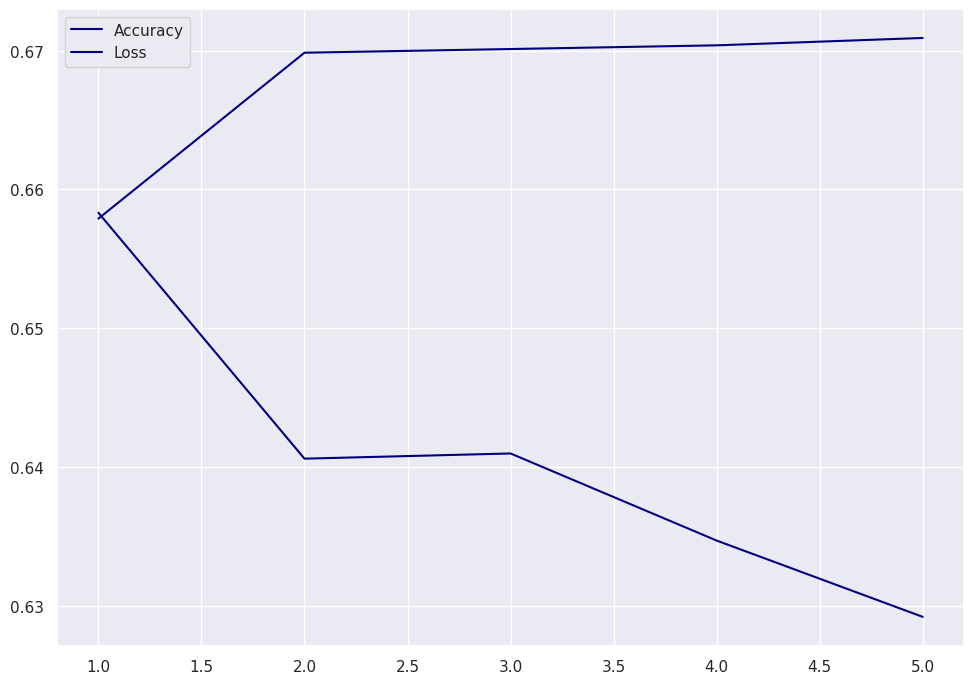

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.legend()

*italicized text*#

In [21]:
from keras.models import load_model

restored_model = load_model('/content/gdrive/My Drive/first_model.h5')

In [22]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a)
    y_test.extend(b)

In [23]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [24]:
pickle.dump(X_test, open('/content/gdrive/My Drive/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/My Drive/y_test.pkl', 'wb'))

In [25]:
X_test = pickle.load(open('/content/gdrive/My Drive/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/y_test.pkl', 'rb'))

In [26]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6228476762771606 / Test accuracy: 0.6707974076271057


In [28]:
# Using the saved model
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6228476762771606 / Test accuracy: 0.6707974076271057


In [29]:
y_pred_prob = model.predict(X_test)

58/58 [==============================] - 1s 16ms/step


In [30]:
# Using the saved model
y_pred_prob = restored_model.predict(X_test)

58/58 [==============================] - 1s 18ms/step


In [31]:
y_pred_prob

array([[0.61511123],
       [0.6693063 ],
       [0.6164439 ],
       ...,
       [0.6284771 ],
       [0.72264284],
       [0.66994244]], dtype=float32)

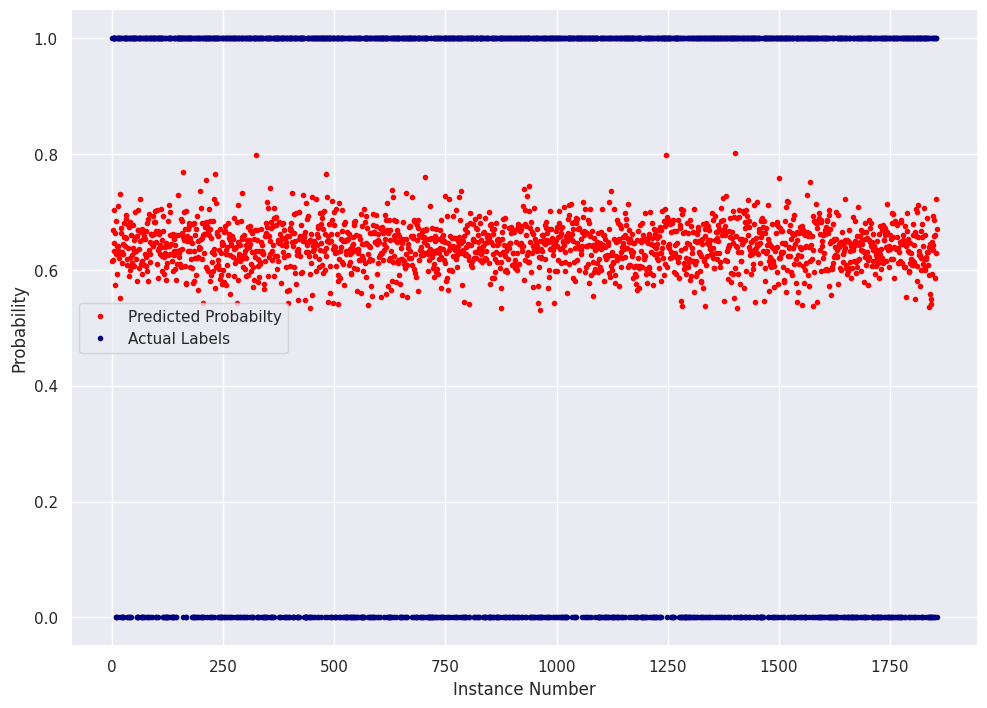

In [32]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [33]:
y_test

array([1., 1., 1., ..., 1., 1., 0.], dtype=float32)

In [34]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

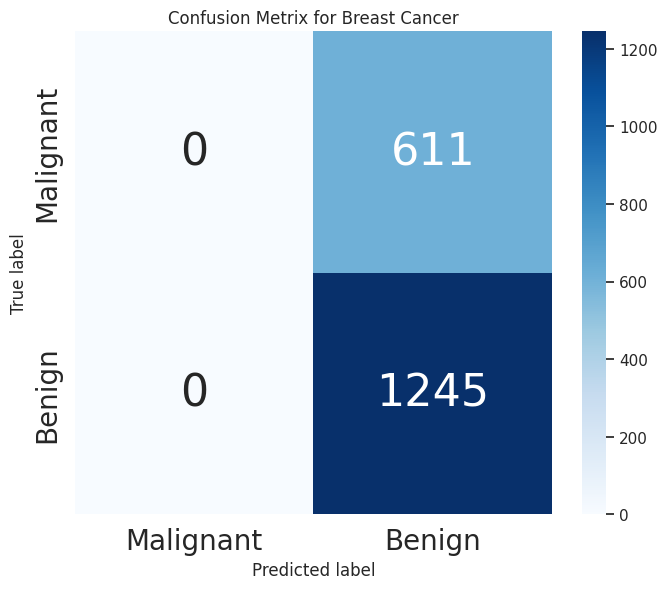

In [36]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [37]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.00      0.00      0.00       611
Malignant (Class 1)       0.67      1.00      0.80      1245

           accuracy                           0.67      1856
          macro avg       0.34      0.50      0.40      1856
       weighted avg       0.45      0.67      0.54      1856



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

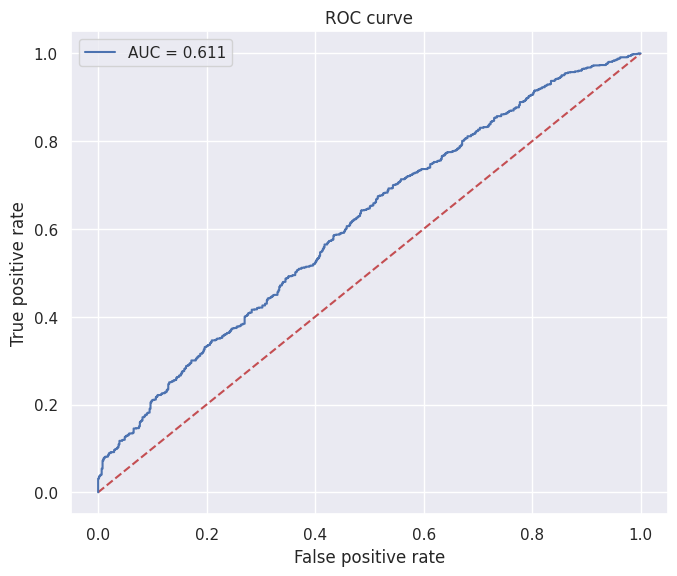

In [39]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

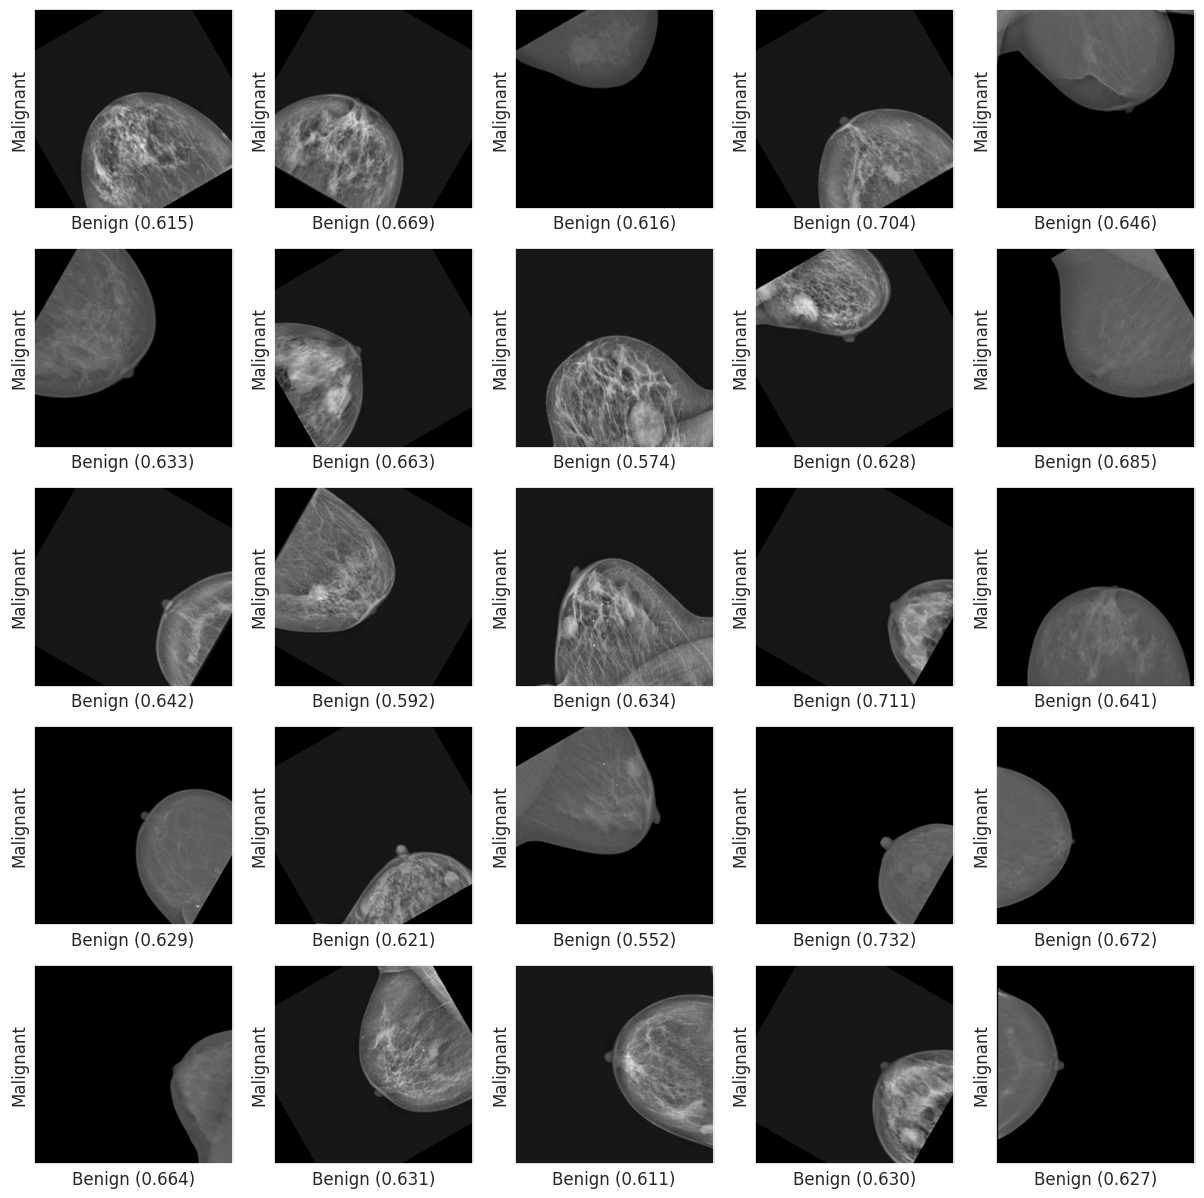

In [41]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


# Transfer Learning using VGG16

## Feature Extraction (freezing the convolutional bases)

In [42]:
from keras.applications.vgg16 import VGG16

backbone = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [43]:
backbone.trainable = False

In [44]:
VGG_model = Sequential()
VGG_model.add(backbone)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())
VGG_model.add(Dropout(0.5))
VGG_model.add(Dense(1, activation='sigmoid'))

In [45]:
VGG_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [46]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                      

In [47]:
# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [48]:
history = VGG_model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=12)
VGG_model.save('/content/gdrive/My Drive/VGG_model.h5')

<ipython-input-48-6387051c2f8e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = VGG_model.fit_generator(generator = train,


Epoch 1/12
59/59 [==============================] - 57s 731ms/step - loss: 0.7869 - accuracy: 0.5875 - val_loss: 0.8009 - val_accuracy: 0.3622
Epoch 2/12
59/59 [==============================] - 22s 378ms/step - loss: 0.5951 - accuracy: 0.6938 - val_loss: 0.6723 - val_accuracy: 0.5718
Epoch 3/12
59/59 [==============================] - 23s 392ms/step - loss: 0.5025 - accuracy: 0.7610 - val_loss: 0.5358 - val_accuracy: 0.7479
Epoch 4/12
59/59 [==============================] - 23s 387ms/step - loss: 0.4415 - accuracy: 0.7929 - val_loss: 0.5038 - val_accuracy: 0.7521
Epoch 5/12
59/59 [==============================] - 23s 383ms/step - loss: 0.4035 - accuracy: 0.8177 - val_loss: 0.4629 - val_accuracy: 0.7945
Epoch 6/12
59/59 [==============================] - 23s 394ms/step - loss: 0.3511 - accuracy: 0.8429 - val_loss: 0.3527 - val_accuracy: 0.8564
Epoch 7/12
59/59 [==============================] - 23s 388ms/step - loss: 0.3048 - accuracy: 0.8719 - val_loss: 0.5011 - val_accuracy: 0.7652

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
VGG_model = load_model('/content/gdrive/My Drive/VGG_model.h5')

In [50]:
score1 = VGG_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

Test loss: 0.3023701608181 / Test accuracy: 0.8663793206214905


In [51]:
y_pred_prob_2 = VGG_model.predict(X_test)

58/58 [==============================] - 7s 124ms/step


In [52]:
threshold = 0.5
y_pred_2 = np.where(y_pred_prob_2 > threshold, 1,0)
y_pred_2.squeeze()

array([1, 1, 1, ..., 1, 1, 0])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

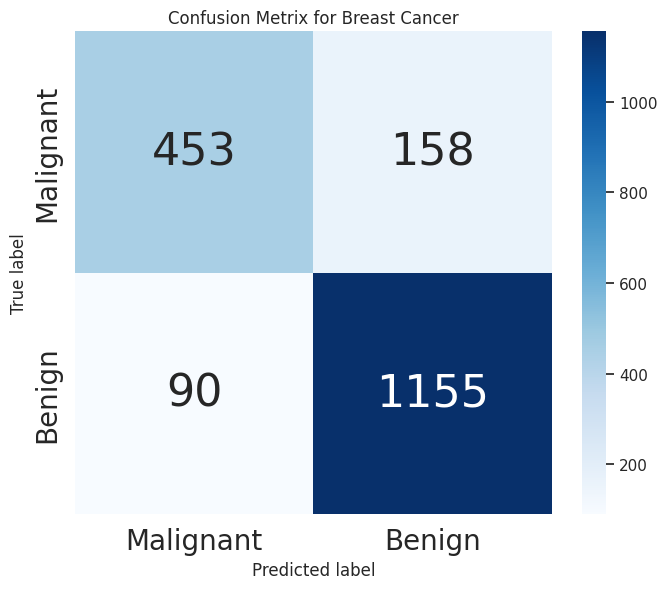

In [53]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_2),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [54]:
print(classification_report(y_test, y_pred_2, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.83      0.74      0.79       611
Malignant (Class 1)       0.88      0.93      0.90      1245

           accuracy                           0.87      1856
          macro avg       0.86      0.83      0.84      1856
       weighted avg       0.86      0.87      0.86      1856



## Fine Tuning

In [55]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

In [56]:
backbone.trainable = True

In [57]:
# Unfreeze final 2 convolution blocks

set_trainable = False
for layer in backbone2.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [58]:
VGG_model_2 = Sequential()
VGG_model_2.add(backbone2)
VGG_model_2.add(GlobalAveragePooling2D())
VGG_model_2.add(BatchNormalization())
VGG_model_2.add(Dropout(0.5))
VGG_model_2.add(Dense(1, activation='sigmoid'))

In [59]:
VGG_model_2.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [60]:
VGG_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14717249 (56.14 MB)
Trainable params: 12

In [61]:
history = VGG_model_2.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model_2.save('/content/gdrive/My Drive/VGG_model_2.h5')

<ipython-input-61-30d63ec49e32>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = VGG_model_2.fit_generator(generator = train,


Epoch 1/10
59/59 [==============================] - 44s 625ms/step - loss: 0.6515 - accuracy: 0.6374 - val_loss: 0.5975 - val_accuracy: 0.6698
Epoch 2/10
59/59 [==============================] - 30s 510ms/step - loss: 0.4498 - accuracy: 0.7921 - val_loss: 0.5574 - val_accuracy: 0.8003
Epoch 3/10
59/59 [==============================] - 30s 512ms/step - loss: 0.2969 - accuracy: 0.8740 - val_loss: 0.4734 - val_accuracy: 0.7767
Epoch 4/10
59/59 [==============================] - 30s 513ms/step - loss: 0.2191 - accuracy: 0.9123 - val_loss: 0.4014 - val_accuracy: 0.8789
Epoch 5/10
59/59 [==============================] - 30s 515ms/step - loss: 0.1662 - accuracy: 0.9383 - val_loss: 0.4762 - val_accuracy: 0.7678
Epoch 6/10
59/59 [==============================] - 30s 502ms/step - loss: 0.1015 - accuracy: 0.9638 - val_loss: 0.2196 - val_accuracy: 0.9088
Epoch 7/10
59/59 [==============================] - 30s 512ms/step - loss: 0.0747 - accuracy: 0.9732 - val_loss: 0.1160 - val_accuracy: 0.9633

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
VGG_model_2 = load_model('/content/gdrive/My Drive/VGG_model_2.h5')

In [63]:
score2 = VGG_model_2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

Test loss: 0.13854029774665833 / Test accuracy: 0.9471982717514038


In [64]:
y_pred_prob_3 = VGG_model_2.predict(X_test)

58/58 [==============================] - 7s 122ms/step


In [65]:
threshold = 0.5
y_pred_3 = np.where(y_pred_prob_3 > threshold, 1,0)
y_pred_3.squeeze()

array([0, 1, 1, ..., 1, 1, 0])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

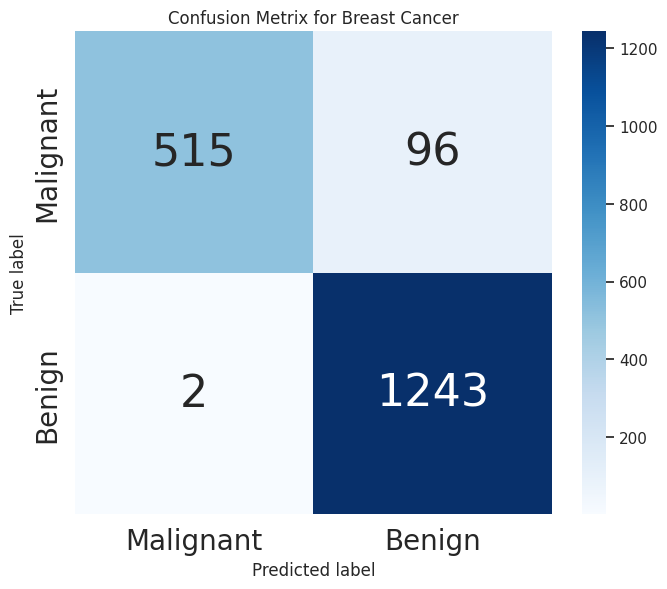

In [66]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_3),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [67]:
print(classification_report(y_test, y_pred_3, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       1.00      0.84      0.91       611
Malignant (Class 1)       0.93      1.00      0.96      1245

           accuracy                           0.95      1856
          macro avg       0.96      0.92      0.94      1856
       weighted avg       0.95      0.95      0.95      1856



# Transfer Learning using ResNet50

In [68]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [69]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [70]:
backbone3.training = False

In [71]:
ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D())
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

In [72]:
ResNet50_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 23536641 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [73]:
ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
ResNet50_model.save('/content/gdrive/My Drive/ResNet50_model.h5')

<ipython-input-74-27ae72f76487>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = ResNet50_model.fit_generator(generator = train,


Epoch 1/10
59/59 [==============================] - 100s 983ms/step - loss: 0.4901 - accuracy: 0.7610 - val_loss: 0.7007 - val_accuracy: 0.3842
Epoch 2/10
59/59 [==============================] - 47s 791ms/step - loss: 0.1212 - accuracy: 0.9585 - val_loss: 0.7751 - val_accuracy: 0.3302
Epoch 3/10
59/59 [==============================] - 46s 779ms/step - loss: 0.0277 - accuracy: 0.9928 - val_loss: 0.9389 - val_accuracy: 0.3302
Epoch 4/10
59/59 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9981

In [ ]:
ResNet50_model = load_model('/content/gdrive/My Drive/ResNet50_model.h5')

In [ ]:
score3 = ResNet50_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

Test loss: 0.9343592524528503 / Test accuracy: 0.6767241358757019


In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)

58/58 [==============================] - 6s 93ms/step


In [ ]:
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

array([1, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

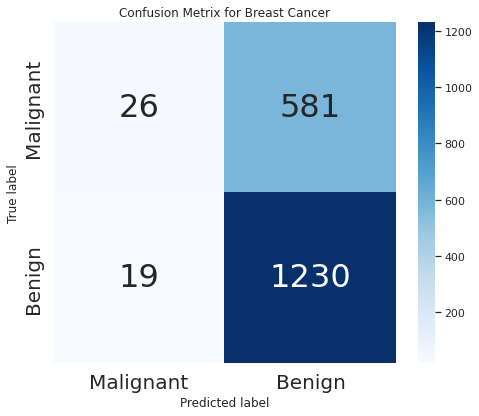

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_4),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_4, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.58      0.04      0.08       607
Malignant (Class 1)       0.68      0.98      0.80      1249

           accuracy                           0.68      1856
          macro avg       0.63      0.51      0.44      1856
       weighted avg       0.65      0.68      0.57      1856

